/usr/local/lib/python3.4/dist-packages/sklearn/decomposition/pca.py:501: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ / total_var.sum()


In [161]:
from scipy.stats import pearsonr
candidate_idx = 0
corrs = []
inverse_map = pca.components_
print(inverse_map.shape)
high_dim = beta_hat_dmr[:, candidate_idx, :-1].dot(inverse_map) # NxK x KxP
print(high_dim.shape)
for p in range(X_train.shape[1]):
    corrs.append(pearsonr(high_dim[:, p], Y_train[:, candidate_idx]))
coefs = [c[0] for c in corrs]
ps    = [c[1] for c in corrs]

(20, 225)
(2135, 225)


/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [162]:
sorted_idxs = np.argsort(np.abs(coefs))
sorted_ps   = np.argsort(np.abs(ps))

In [163]:
#print([coefs[s] for s in reversed(sorted_idxs) if ps[s] != 1.0])

In [164]:
rep_names = []
with open("representations.csv", 'r') as csvfile:
    header = next(csvfile).split(",")[1:]
    for line in csvfile:
        rep_names.extend(list(map(lambda x: "{}{}".format(line.split(",")[0], x), header)))

In [165]:
print(rep_names)

['ObamaAbortion1', 'ObamaAbortion2', 'ObamaAlcohol', 'ObamaChina', 'ObamaCC', 'ObamaCriminal1', 'ObamaCriminal2', 'ObamaCriminal3', 'ObamaCuba', 'ObamaDeath', 'ObamaEcon1', 'ObamaEcon2', 'ObamaEcon3', 'ObamaEcon4', 'ObamaEcon5', 'ObamaEcon6', 'ObamaEcon7', 'ObamaEcon8', 'ObamaEcon9', 'ObamaEcon10', 'ObamaEdu1', 'ObamaEdu2', 'ObamaEdu3', 'ObamaEdu4', 'ObamaEdu5', 'ObamaEdu6', 'ObamaElec1', 'ObamaElec2', 'ObamaEne1', 'ObamaEne2', 'ObamaEne3', 'ObamaEne4', 'ObamaEnv1', 'ObamaEnv2', 'ObamaEnv3', 'ObamaEuth', 'ObamaGMO', 'ObamaGun1', 'ObamaGun2', 'ObamaHealth1', 'ObamaHealth2', 'ObamaHealth3', 'ObamaHealth4', 'ObamaImmi1', 'ObamaImmi2', 'ObamaImmi3', 'ObamaImmi4', 'ObamaImmi5', 'ObamaImmi6', 'ObamaIran', 'ObamaIraq1', 'ObamaIraq2', 'ObamaIsrael', 'ObamaMarriage1', 'ObamaMarriage2', 'ObamaMarijuana1', 'ObamaMarijuana2', 'ObamaMil1', 'ObamaMil2', 'ObamaMil3', 'ObamaNat', 'ObamaOcu', 'ObamaPub', 'ObamaRel1', 'ObamaRel2', 'ObamaSoc', 'ObamaStem', 'ObamaSyria', 'ObamaTax1', 'ObamaTax2', 'ObamaTa

In [166]:
for s in reversed(sorted_idxs):
    if ps[s] != 1.0:
        print(rep_names[s], corrs[s])
#print([rep_names[s] for s in reversed(sorted_idxs) if ps[s] != 1.0])

ObamaEcon9 (0.041602082694090804, 0.05460894837758331)
ObamaEcon5 (0.03743159332725688, 0.0837805492537893)
ObamaDeath (0.03441433647767011, 0.111904582054851)
ObamaCriminal2 (0.028165076869973753, 0.1932950310274462)
ObamaEcon4 (-0.021302247972224686, 0.3252000188098557)
ObamaEcon1 (0.021243983473188847, 0.3265253669396666)
ObamaCriminal1 (-0.020922818446012383, 0.3338937821026141)
ObamaEcon2 (0.01963420074751438, 0.3645257059978222)
ObamaEcon8 (-0.019560352760989774, 0.3663327635021656)
ObamaEcon6 (0.017753473234262133, 0.4122718296079636)
ObamaAbortion2 (-0.014430961484660828, 0.5051285773869648)
ObamaCC (-0.012715310798530197, 0.5570666548876648)
ObamaAbortion1 (0.011477669264189, 0.5960809050169298)
ObamaChina (0.008823785863448029, 0.6836543488057087)
ObamaAlcohol (0.008031488220399383, 0.7107179162326103)
ObamaEcon10 (0.004759526206952902, 0.8260336126829333)
RomneyEcon1 (-0.004759526206952893, 0.8260336126829333)
RomneyDeath (-0.004759526206952893, 0.8260336126829333)
ObamaNat 

In [167]:
from scipy.stats import pearsonr
candidate_idx = 0
corrs = []
#inverse_map = pca.components_
#print(inverse_map.shape)
#high_dim = beta_hat_dmr[:, candidate_idx, :-1].dot(inverse_map) # NxK x KxP
#print(high_dim.shape)
for p in range(Z_train.shape[1]):
    corrs.append(pearsonr(Z_train[:, p], Y_train[:, candidate_idx]))
coefs = [c[0] for c in corrs]
ps    = [c[1] for c in corrs]

In [168]:
sorted_idxs = np.argsort(np.abs(coefs))
sorted_ps   = np.argsort(np.abs(ps))

In [169]:
import pandas as pd
census_dir = "Data/2010_Census"
dfs = []
for filename in os.listdir(census_dir):
    if ".csv" in filename:
        #print(filename)
        try:
            dfs.append(pd.read_csv("{}/{}".format(census_dir, filename), header=0, sep=','))
        except:
            print("Error with file {}".format(filename))
            continue
df = pd.concat(dfs)

Error with file cc-est2016-alldata-35.csv


In [170]:
covar_names_age = df.columns.values[7:]
covar_names = []
for i in range(19):
    covar_names.extend(list(map(lambda x: "{}_{}".format(x, i), covar_names_age)))

In [171]:
"""
for s in reversed(sorted_idxs):
    if ps[s] != 1.0:
        print(covar_names[s], corrs[s])
"""
#print([rep_names[s] for s in reversed(sorted_idxs) if ps[s] != 1.0])

'\nfor s in reversed(sorted_idxs):\n    if ps[s] != 1.0:\n        print(covar_names[s], corrs[s])\n'

In [172]:
print(Z_train.shape)
print(beta_hat_dmr.shape)

(2135, 1314)
(2135, 3, 21)


[26, 141, 208, 269, 356, 357, 391, 448, 490, 536, 545, 558, 636, 657, 677, 701, 719, 808, 840, 891, 901, 908, 934, 944, 975, 977, 1006, 1008, 1027, 1105, 1110, 1127, 1136, 1149, 1237, 1329, 1346, 1394, 1513, 1523, 1625, 1633, 1825, 1872, 1916, 1937, 1963, 1987, 2072, 2081, 2082, 2111]


In [174]:
"""delta_beta_hat = np.zeros((beta_hat_dmr.shape[0], beta_hat_dmr.shape[0]))
phi_beta = np.load("phi_beta.npy")
for i in range(beta_hat_dmr.shape[0]):
    for j in range(i):
        delta_beta_hat[i, j] = np.abs(beta_hat_dmr[i] - beta_hat_dmr[j]).flatten().dot(phi_beta)
"""

'delta_beta_hat = np.zeros((beta_hat_dmr.shape[0], beta_hat_dmr.shape[0]))\nphi_beta = np.load("phi_beta.npy")\nfor i in range(beta_hat_dmr.shape[0]):\n    for j in range(i):\n        delta_beta_hat[i, j] = np.abs(beta_hat_dmr[i] - beta_hat_dmr[j]).flatten().dot(phi_beta)\n'

In [175]:
phi_u = np.ones((delta_Z.shape[2]))
delta_u = np.array([np.array([delta_Z[i, j].dot(phi_u) for i in range(delta_Z.shape[0])]) for j in range(delta_Z.shape[1])])

In [2]:
import numpy as np
import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from distance_matching_functional import DistanceMatching
import functions
import utils
import matplotlib.pyplot as plt
%matplotlib inline

# Load learned models and data

X_train = np.load("X_train.npy")
Y_train = np.load("Y_train.npy")
Z_train = np.load("Z_train.npy")
X_test  = np.load("X_test.npy")
Y_test  = np.load("Y_test.npy")
Z_test  = np.load("Z_test.npy")
delta_Z = np.load("delta_Z.npy")
K = Z_train.shape[1]
print(Z_train.shape)
beta_hat_dmr = np.load("beta_hat_dmr_lr.npy")
beta_lr_z = np.load("beta_har_dmr_lr_z.npy")
print(beta_hat_dmr)

# Sanity checks: What are the demographics that correspond to conservative/liberal counties?

"""
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced  = pca.transform(X_test)

X_train_reduced = np.hstack((X_train_reduced, np.expand_dims(np.ones_like(X_train_reduced[:, 0]), 1)))
X_test_reduced  = np.hstack((X_test_reduced,  np.expand_dims(np.ones_like(X_test_reduced[:, 0]), 1)))
"""

fips_train = np.load("fips_train.npy")
fips_test  = np.load("fips_test.npy")
pa_idx_train = [i for i in range(len(X_train)) if int(fips_train[i]/1000) == 42] # PA
pa_idx_test  = [i for i in range(len(X_test)) if int(fips_test[i]/1000) == 42]   # PA
print(pa_idx_train)

(2135, 11)
[[[-1.6711e-01 -1.0376e-11 -4.7677e-02  1.0376e-11 -1.0376e-11
   -6.7893e-02]
  [ 1.6711e-01 -1.0376e-11  4.7677e-02 -1.0376e-11  1.0376e-11
    6.7893e-02]
  [-6.7106e-02  1.0325e-01 -1.0928e-01  1.3364e-02 -8.4452e-02
   -1.9775e-02]]

 [[-1.4911e-02  3.4379e-12  5.5046e-02 -3.4379e-12  3.4379e-12
    3.9226e-02]
  [ 1.4911e-02  3.4379e-12 -5.5046e-02  3.4379e-12 -3.4379e-12
   -3.9226e-02]
  [-3.6868e-02 -2.7620e-02  3.0649e-02  3.9566e-02 -1.7937e-03
   -1.2690e-02]]

 [[-4.4593e-01 -1.9824e-11  1.8911e-02  1.9824e-11 -1.9824e-11
   -1.8363e-01]
  [ 4.4593e-01 -1.9824e-11 -1.8911e-02 -1.9824e-11  1.9824e-11
    1.8363e-01]
  [-2.8639e-01  2.3984e-01 -2.0090e-01  4.6272e-02 -2.2238e-01
   -3.7879e-02]]

 ...

 [[ 6.5025e-02 -2.8344e-12 -1.2433e-02  2.8344e-12 -2.8344e-12
   -1.7852e-01]
  [-6.5025e-02 -2.8344e-12  1.2433e-02 -2.8344e-12  2.8344e-12
    1.7852e-01]
  [-7.3709e-03  6.6609e-02  7.3459e-03 -1.5869e-01  1.2110e-02
    7.9865e-02]]

 [[ 1.6227e-01 -9.1361e-12 

In [3]:
import pandas as pd
df = pd.read_csv("fips_data.csv", header=0, sep=' \t')
df.head()
county_names = df[["Name"]].values
fips_list    = df[["FIPS"]].values
county_for_fip = {}
for i in range(len(county_names)):
    county_for_fip[fips_list[i][0]] = county_names[i][0]
#print(county_for_fip)

pa_counties = [county_for_fip[fips_train[p]] for p in pa_idx_train]
pa_counties_test = [county_for_fip[fips_test[p]] for p in pa_idx_test]
print(pa_counties)
print(pa_counties_test)


['Allegheny', 'Montour', 'York', 'Fayette', 'Adams', 'Union', 'Carbon', 'Forest', 'Perry', 'Cameron', 'Potter', 'Clinton', 'Dauphin', 'Mercer', 'Fulton', 'Centre', 'Delaware', 'Montgomery', 'Warren', 'Pike', 'Lehigh', 'Schuylkill', 'Mifflin', 'Susquehanna', 'Juniata', 'Bedford', 'Luzerne', 'Bradford', 'Lackawanna', 'Somerset', 'Elk', 'Butler', 'Erie', 'Lycoming', 'Sullivan', 'Indiana', 'Chester', 'Monroe', 'Northampton', 'Crawford', 'Armstrong', 'Lebanon', 'Cumberland', 'Cambria', 'Huntingdon', 'Westmoreland', 'Columbia', 'Bucks', 'Berks', 'Clarion', 'Venango', 'Lancaster', 'Snyder', 'Franklin', 'McKean', 'Clearfield']
['Philadelphia', 'Greene', 'Jefferson', 'Tioga', 'Wayne', 'Northumberland', 'Blair', 'Lawrence', 'Wyoming', 'Washington', 'Beaver']


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [4]:
from sklearn.cluster import DBSCAN, SpectralClustering
sc = SpectralClustering(n_clusters=8)
beta_hat_flat = np.array([beta_hat_dmr[i, :1].flatten() for i in pa_idx_train])

In [5]:
#labels = sc.fit_predict(beta_hat_flat)
def print_clusters(data, min_samples=2):
    eps = 0.03
    #db = DBSCAN(eps=0.03, min_samples=min_samples, metric='correlation')
    db = SpectralClustering(n_clusters=8)
    labels = db.fit_predict(data)
    while np.max(labels) < 3 or np.max(labels) > 8:
        print(eps, np.max(labels))
        if np.max(labels) < 3 and np.max(labels) >= 0: 
            eps /= 2. + np.random.uniform(-0.1, 0.1)
        else:
            eps *= 2 + np.random.uniform(-0.1, 0.1)
        #if np.mean(np.where(labels == -1)) > 0.5:
        #    min_samples -=1
        db = DBSCAN(eps=eps, min_samples=min_samples, metric='correlation')
        labels = db.fit_predict(data)
        #print(labels)
    noise_labels = np.where(labels == -1)[0]
    #if len(noise_labels) > 1:
    #        labels[noise_labels] = np.max(labels) + print_clusters(data[noise_labels], 1)
    for i in set(labels):
        if i == -1:
            print("Noise: ", end=' ')
        x = np.where(labels == i)[0]
        print(sorted([pa_counties[j] for j in x]))
    return labels
        
print("Clusters Induced by Z:\n========")
print_clusters(np.array([beta_lr_z[i] for i in pa_idx_train]))
print("Clusters Induced by Beta:\n========")
print_clusters(beta_hat_flat)
print("\nClusters Induced by U:\n=========")
print_clusters(np.array([Z_train[i] for i in pa_idx_train]))
print("\nClusters Induced by Y:\n=========")
print_clusters(np.array([Y_train[i] for i in pa_idx_train]))

Clusters Induced by Z:
['Berks', 'Bucks', 'Centre', 'Columbia', 'Cumberland', 'Dauphin', 'Delaware', 'Erie', 'Fayette', 'Forest', 'Lackawanna', 'Luzerne', 'Mercer', 'Monroe', 'Montgomery', 'Montour']
['Lehigh']
['Union']
['Bedford', 'Butler', 'Cambria', 'Carbon', 'Clearfield', 'Clinton', 'Elk', 'Huntingdon', 'Juniata', 'Lancaster', 'Lebanon', 'Lycoming', 'Mifflin', 'Potter', 'Schuylkill', 'Snyder', 'Somerset', 'Sullivan', 'Warren']
['McKean']
['Chester']
['Northampton']
['Adams', 'Allegheny', 'Armstrong', 'Bradford', 'Cameron', 'Clarion', 'Crawford', 'Franklin', 'Fulton', 'Indiana', 'Perry', 'Pike', 'Susquehanna', 'Venango', 'Westmoreland', 'York']
Clusters Induced by Beta:
['Adams', 'Armstrong', 'Bedford', 'Bucks', 'Carbon', 'Centre', 'Clinton', 'Elk', 'Mifflin', 'Northampton', 'Somerset']
['Cumberland', 'Dauphin', 'Delaware', 'Erie', 'Fayette', 'Lackawanna', 'Mercer', 'Montgomery', 'Montour']
['Berks', 'Clearfield', 'Forest', 'Huntingdon', 'Lancaster', 'Lebanon', 'Lycoming', 'Monroe'

/usr/local/lib/python3.4/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([7, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 7, 7, 3, 7, 7, 7, 6, 1, 7, 1,
       3, 1, 3, 3, 7, 1, 7, 3, 1, 3, 7, 3, 1, 5, 7, 7, 7, 1, 3, 1, 2, 4,
       3, 1, 1, 7, 7, 3, 1, 0, 3, 3, 1, 1], dtype=int32)

In [6]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

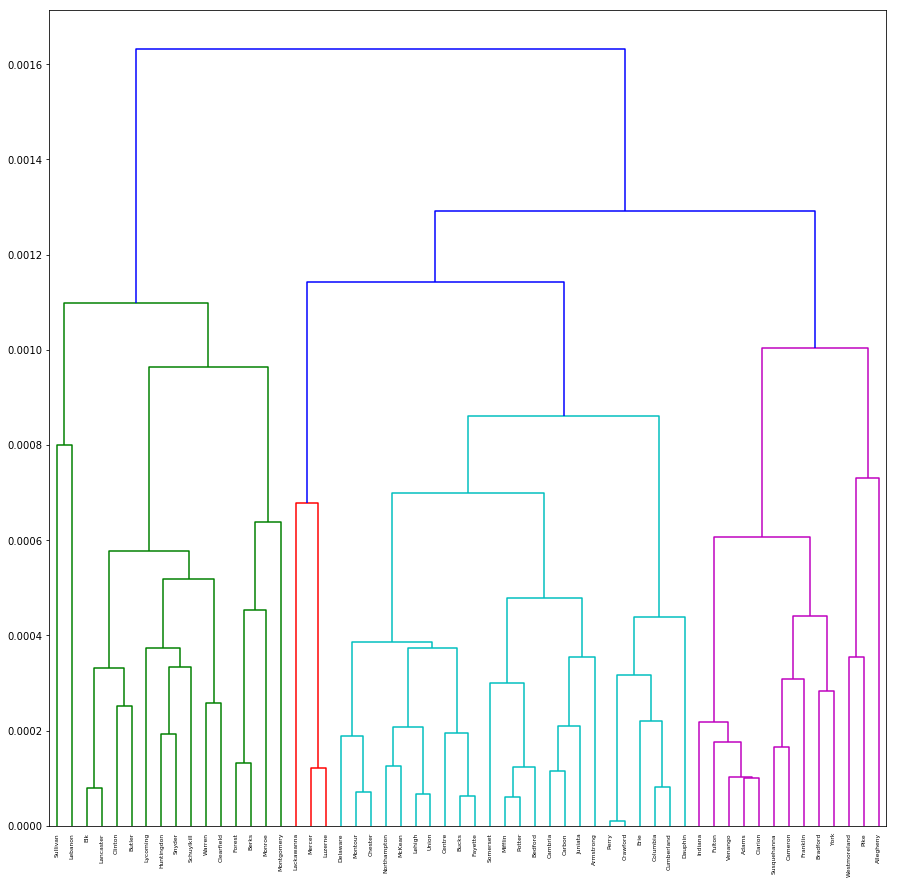

In [7]:
fig = plt.figure(figsize=(15, 15))
l_beta = linkage(np.array([beta_lr_z[i] for i in pa_idx_train]),
                 method='average', metric='euclidean', optimal_ordering=True)
dendrogram(l_beta, labels=pa_counties)
plt.savefig("pa_counties/pa_counties_beta.png", dpi=300)

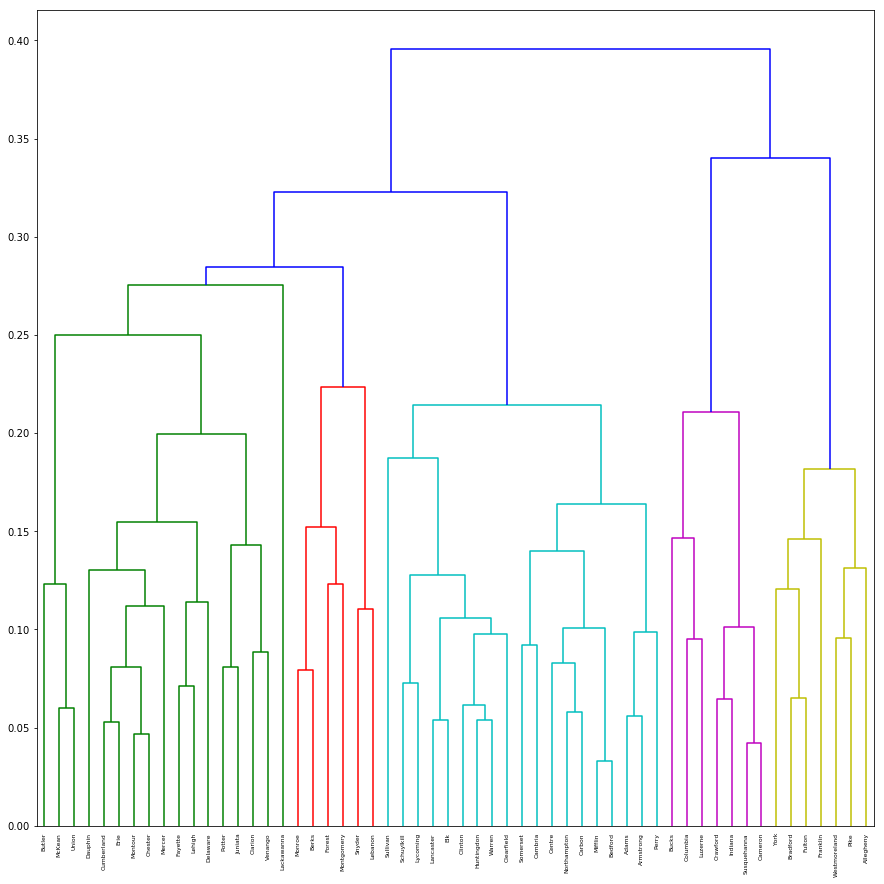

In [8]:
fig = plt.figure(figsize=(15, 15))
l_beta = linkage(beta_hat_flat,
                 method='average', metric='euclidean', optimal_ordering=True)
dendrogram(l_beta, labels=pa_counties)
plt.savefig("pa_counties/pa_counties_beta.png", dpi=300)

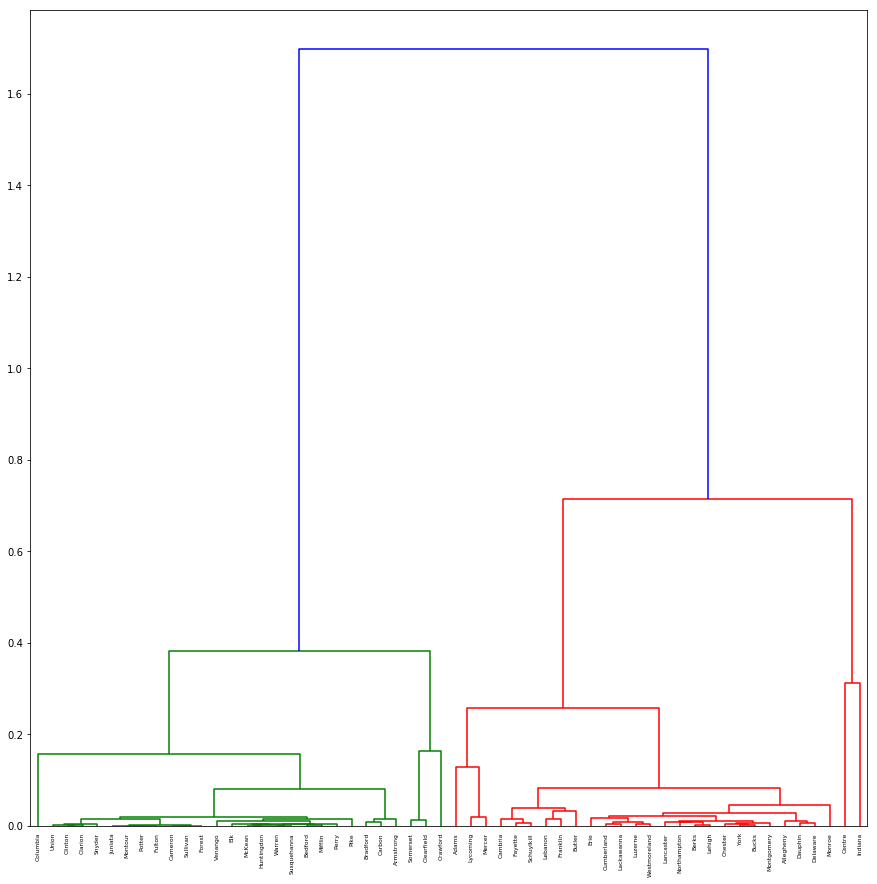

In [9]:
plt.figure(figsize=(15, 15))
l_u = linkage(np.array([Z_train[i][:-1] for i in pa_idx_train]),
                 method='average', metric='correlation', optimal_ordering=True)
dendrogram(l_u, labels=pa_counties)
plt.savefig("pa_counties/pa_counties_u.png", dpi=300)

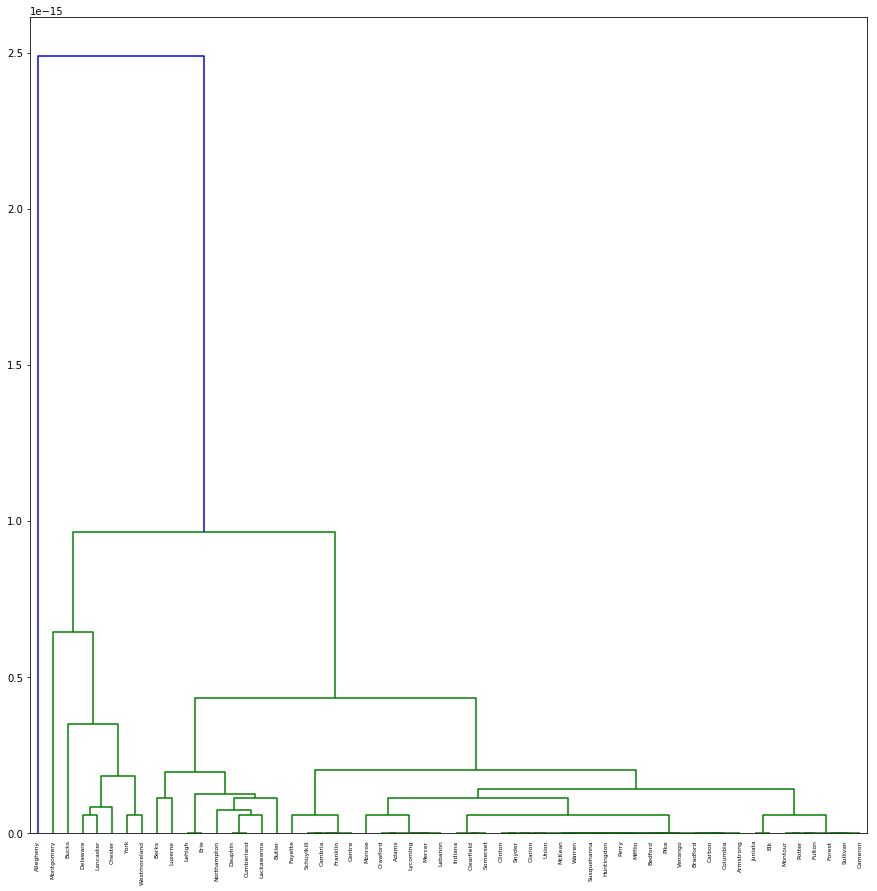

In [10]:
plt.figure(figsize=(15, 15))
vc_beta = np.load("beta_hat_vc.npy")
l_vc = linkage(np.array([vc_beta[i].flatten() for i in pa_idx_train]),
                 method='average', metric='euclidean', optimal_ordering=True)
dendrogram(l_vc, labels=pa_counties)
plt.savefig("pa_counties/pa_counties_vc.png", dpi=300)

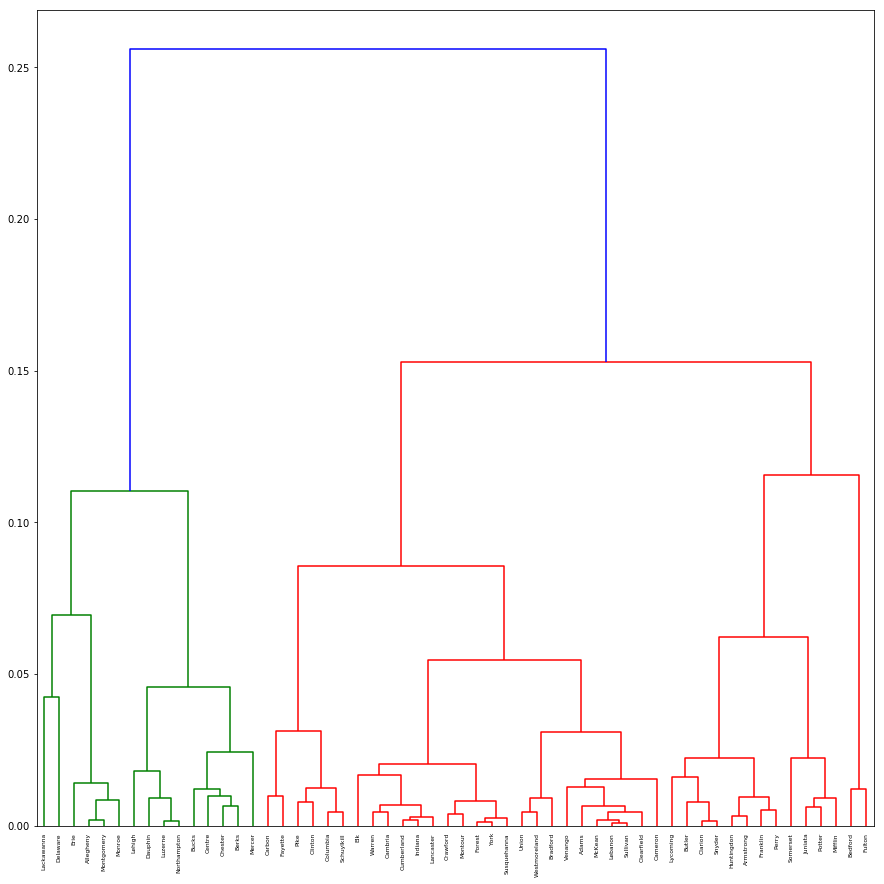

In [11]:
plt.figure(figsize=(15, 15))
l_y = linkage(np.array([Y_train[i] for i in pa_idx_train]),
                 method='average', metric='euclidean', optimal_ordering=True)
dendrogram(l_y, labels=pa_counties)
plt.savefig("pa_counties/pa_counties_y.png", dpi=300)

In [12]:
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2)
#beta_reduced = pca.fit_transform(np.array([beta_hat_dmr[i][:-1].flatten() for i in pa_idx_train]))
#u_reduced    = pca.fit_transform(np.array([Z_train[i][:-1] for i in pa_idx_train]))
#beta_reduced = umap.UMAP().fit_transform(np.array([beta_hat_dmr[i][:-1].flatten() for i in pa_idx_train]))
#u_reduced    = umap.UMAP().fit_transform(np.array([Z_train[i] for i in pa_idx_train]))
t = TSNE(n_components=2, n_iter=2500)
beta_reduced = t.fit_transform(np.array([beta_lr_z[i].flatten() for i in pa_idx_train]))#t.fit_transform(np.array([beta_hat_dmr[i][:-1].flatten() for i in pa_idx_train]))
u_reduced    = t.fit_transform(np.array([Z_train[i][:-1] for i in pa_idx_train]))

vc_reduced = t.fit_transform(np.array([vc_beta[i][:-1].flatten() for i in pa_idx_train]))

y_reduced    = Y_train[pa_idx_train, :2]#umap.UMAP().fit_transform(np.array([Y_train[i, :1] for i in pa_idx]))
#print(beta_hat_dmr[pa_idx_train[pa_counties.index("Philadelphia")]])
#print(beta_hat_dmr[pa_idx_train[pa_counties.index("Allegheny")]])
#print(beta_hat_dmr[pa_idx_train[pa_counties.index("Venango")]])
#print(np.sum(delta_Z[pa_idx_train[pa_counties.index("Venango")], pa_idx_train[pa_counties.index("Philadelphia")]]))
#print(np.sum(delta_Z[pa_idx_train[pa_counties.index("Allegheny")], pa_idx_train[pa_counties.index("Philadelphia")]]))

In [16]:
#abbrev = {"Philadelphia": "Phil.", "Allegheny": "Alleg.", "Montour": "Mont."}
def abbrev(name):
    if len(name) > 4:
        return name[:4] + "."
    else:
        return name

for county_name in pa_counties:
    print("{} & {} \\\\".format(abbrev(county_name), county_name))

def plot_and_annotate(data, names, colors):
    fig, axs = plt.subplots(1, 1, figsize=(12,12))#plt.figure(figsize=(12, 12))
    
    #ax = plt.gca()
    ax = axs#[0]
    ax.scatter(data[:, 0], data[:, 1], c=colors, cmap='RdBu')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("t-SNE Axis 1", fontsize=22)
    ax.set_ylabel("t-SNE Axis 2", fontsize=22)
    
    scale_x = np.max(data[:, 0]) - np.min(data[:, 0])
    scale_y = np.max(data[:, 1]) - np.min(data[:, 1])
    min_x = np.inf
    max_x = -np.inf
    min_y = np.inf
    max_y = -np.inf
    for i, txt in enumerate(data):
        #ax.annotate(str(i), (data[i, 0], data[i, 1]+0.001), fontsize=16)
        ax.annotate(abbrev(names[i]), (data[i, 0], data[i, 1]+0.001), fontsize=16)
        if data[i, 0] < min_x:
            min_x = data[i, 0]
        my_right_side = data[i, 0] + 0.01*scale_x*len(names[i])
        if my_right_side > max_x:
            max_x = my_right_side
        if data[i, 1] < min_y:
            min_y = data[i, 1]
        if data[i, 1] > max_y:
            max_y = data[i, 1]
    ax.set_xlim(left=min_x-0.02*scale_x, right=max_x+0.08*scale_x)
    ax.set_ylim(bottom=min_y-0.02*scale_y, top=max_y+0.03*scale_y)
    
    #collabel=("Label", "County")
    #axs[1].axis('off')
    #clust_data = []
    #for i in range(len(data)):
    #    clust_data.append([i, names[i]])
    #the_table = axs[1].table(cellText=clust_data,
    #                         colLabels=collabel, loc='center')

Alle. & Allegheny \\
Mont. & Montour \\
York & York \\
Faye. & Fayette \\
Adam. & Adams \\
Unio. & Union \\
Carb. & Carbon \\
Fore. & Forest \\
Perr. & Perry \\
Came. & Cameron \\
Pott. & Potter \\
Clin. & Clinton \\
Daup. & Dauphin \\
Merc. & Mercer \\
Fult. & Fulton \\
Cent. & Centre \\
Dela. & Delaware \\
Mont. & Montgomery \\
Warr. & Warren \\
Pike & Pike \\
Lehi. & Lehigh \\
Schu. & Schuylkill \\
Miff. & Mifflin \\
Susq. & Susquehanna \\
Juni. & Juniata \\
Bedf. & Bedford \\
Luze. & Luzerne \\
Brad. & Bradford \\
Lack. & Lackawanna \\
Some. & Somerset \\
Elk & Elk \\
Butl. & Butler \\
Erie & Erie \\
Lyco. & Lycoming \\
Sull. & Sullivan \\
Indi. & Indiana \\
Ches. & Chester \\
Monr. & Monroe \\
Nort. & Northampton \\
Craw. & Crawford \\
Arms. & Armstrong \\
Leba. & Lebanon \\
Cumb. & Cumberland \\
Camb. & Cambria \\
Hunt. & Huntingdon \\
West. & Westmoreland \\
Colu. & Columbia \\
Buck. & Bucks \\
Berk. & Berks \\
Clar. & Clarion \\
Vena. & Venango \\
Lanc. & Lancaster \\
Snyd. & S

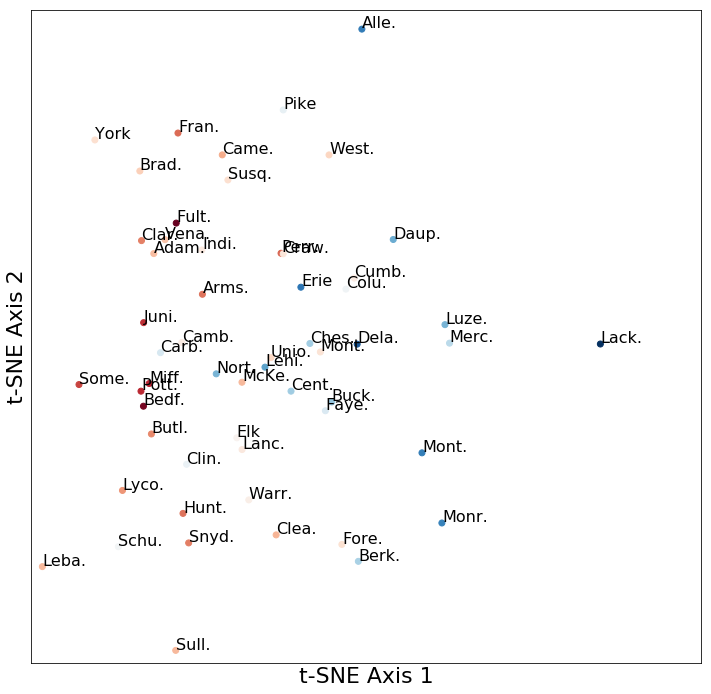

In [17]:
z = np.array([beta_lr_z[i] for i in pa_idx_train])
from sklearn.preprocessing import normalize
z = normalize(z, axis=0)
plot_and_annotate(z,
                  pa_counties, colors=Y_train[pa_idx_train, 0]-Y_train[pa_idx_train, 1])
plt.savefig("pa_counties/pa_counties_z_scatter.pdf", dpi=300, bbox_inches="tight")

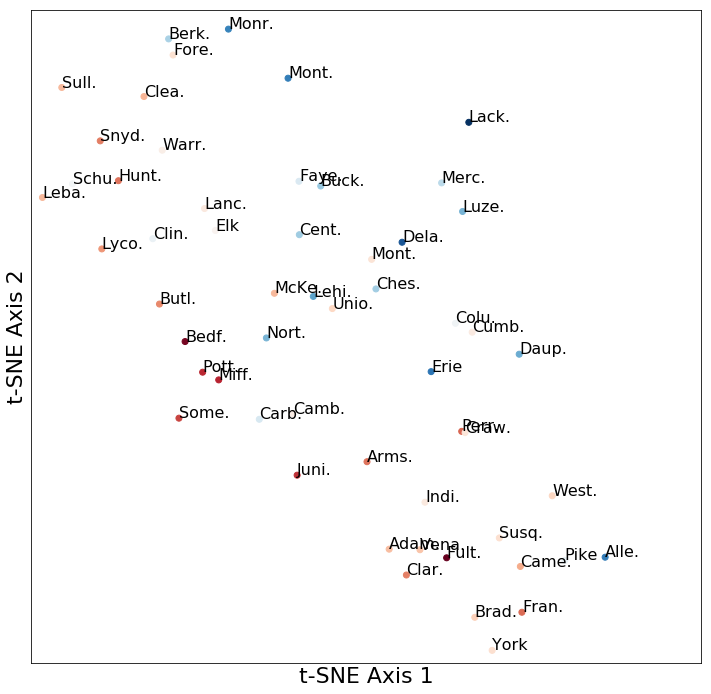

In [18]:
plot_and_annotate(beta_reduced, pa_counties, colors=Y_train[pa_idx_train, 0]-Y_train[pa_idx_train, 1])
plt.savefig("pa_counties/pa_counties_beta_scatter.pdf", dpi=300, bbox_inches="tight")

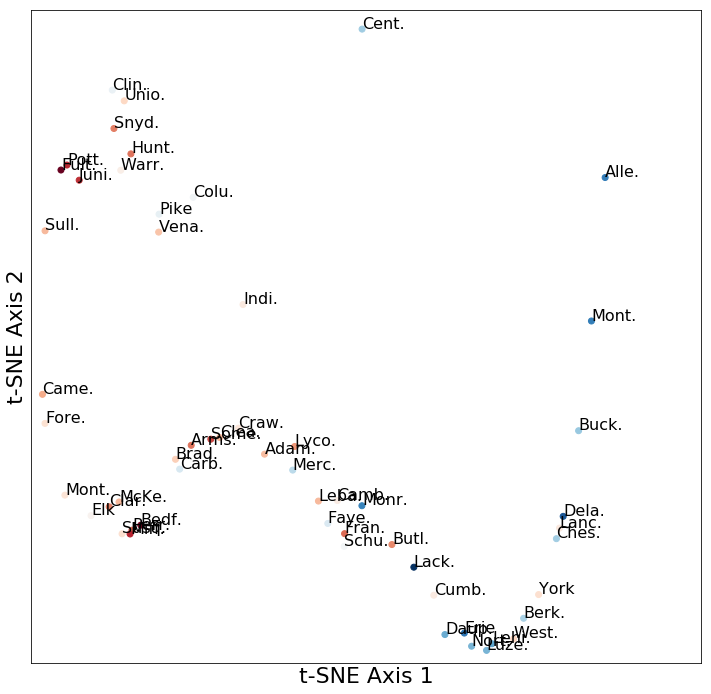

In [19]:
plot_and_annotate(u_reduced, pa_counties, colors=Y_train[pa_idx_train, 0]-Y_train[pa_idx_train, 1])
plt.savefig("pa_counties/pa_counties_u_scatter.pdf", dpi=300, bbox_inches="tight")

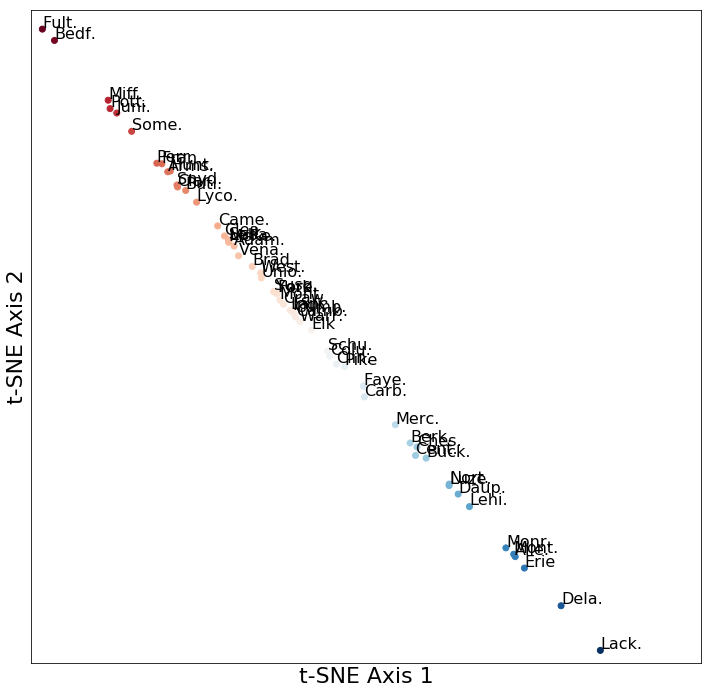

In [20]:
plot_and_annotate(y_reduced, pa_counties, colors=Y_train[pa_idx_train, 0]-Y_train[pa_idx_train, 1])
plt.savefig("pa_counties/pa_counties_y_scatter.pdf", dpi=300, bbox_inches="tight")

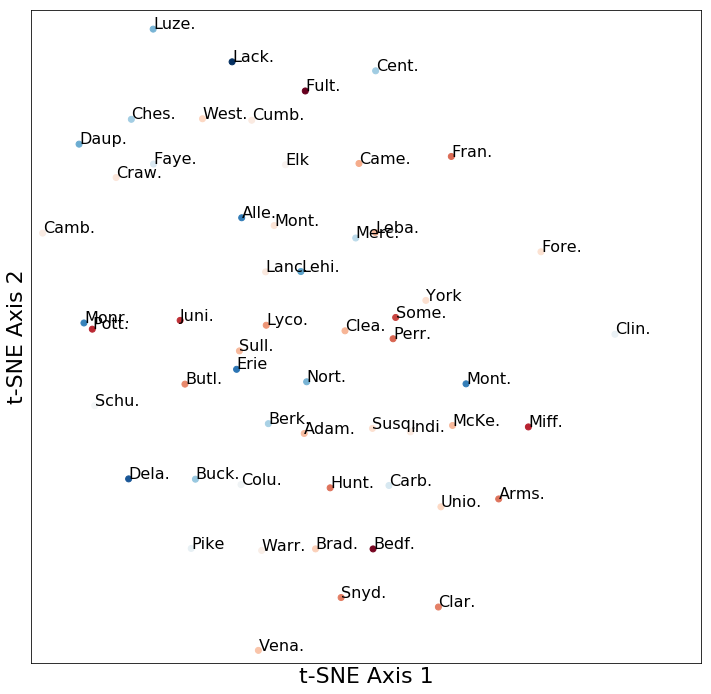

In [21]:
plot_and_annotate(vc_reduced, pa_counties, colors=Y_train[pa_idx_train, 0]-Y_train[pa_idx_train, 1])
plt.savefig("pa_counties/pa_counties_vc_scatter.pdf", dpi=300, bbox_inches="tight")

In [22]:
cat = np.array([ np.hstack((u_reduced[i], Y_train[idx][0])) for i,idx in enumerate(pa_idx_train)])
print(Z_train.shape)
print(cat.shape)
cat_reduced = t.fit_transform(cat)

(2135, 11)
(56, 3)


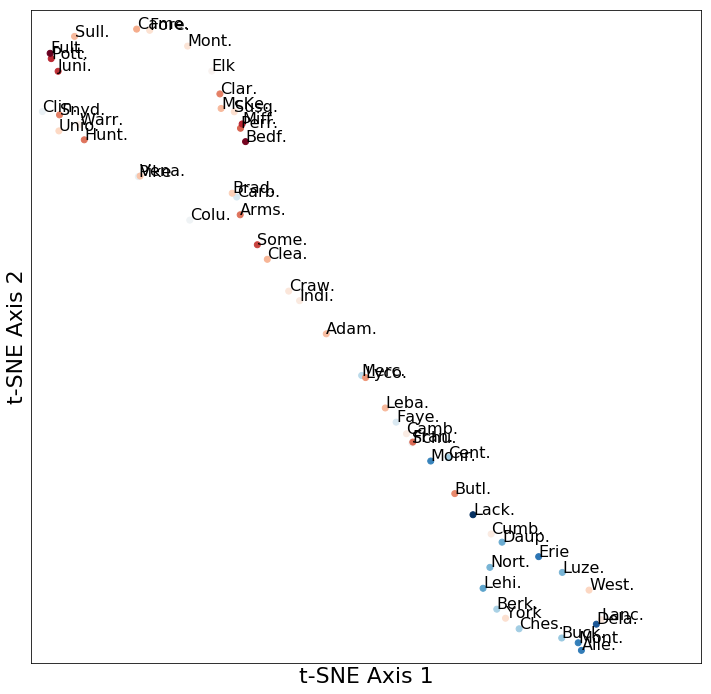

In [23]:
plot_and_annotate(cat_reduced, pa_counties, colors=Y_train[pa_idx_train, 0]-Y_train[pa_idx_train, 1])
plt.savefig("pa_counties/pa_counties_cat_scatter.pdf", dpi=300, bbox_inches="tight")

In [24]:
results_08 = np.load("Data/2008_Election/election_results.npy")

In [25]:
print(dir(results_08))#['pennsylvania'])

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imod__', '__imul__', '__index__', '__init__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__rpow__', '__rrshift__', '__rsh

In [26]:
import pickle

In [27]:
def load_obj(name):
    with open("Data/2008_Election/" + name + '.pkl', 'rb') as f:
        return pickle.load(f)

results_08 = load_obj("election_results")

In [28]:
pa_08 = results_08['pennsylvania']
pa_08_counties = pa_08[0]
pa_08_votes = pa_08[1]
print(len(pa_08_counties))
print(len(pa_08_votes))
print(pa_08_votes) # Obama | McCain

67
67
[['17,475', '26,134'], ['368,453', '269,819'], ['10,729', '17,715'], ['39,738', '42,358'], ['6,001', '15,928'], ['91,803', '75,868'], ['18,798', '30,812'], ['10,202', '14,911'], ['178,345', '149,860'], ['29,882', '52,294'], ['30,697', '29,981'], ['802', '1,239'], ['13,235', '12,646'], ['41,141', '32,543'], ['135,150', '112,266'], ['6,415', '10,126'], ['14,549', '18,656'], ['6,799', '7,126'], ['12,597', '13,704'], ['15,684', '19,265'], ['45,355', '59,693'], ['69,352', '57,964'], ['170,949', '109,766'], ['6,910', '6,252'], ['74,206', '49,284'], ['25,509', '25,669'], ['1,014', '1,366'], ['21,052', '41,711'], ['1,562', '4,612'], ['7,365', '7,451'], ['6,611', '11,724'], ['16,964', '19,617'], ['6,132', '11,248'], ['3,055', '6,463'], ['67,112', '39,198'], ['97,290', '124,475'], ['19,371', '21,496'], ['22,004', '32,325'], ['86,226', '62,668'], ['71,903', '60,512'], ['18,335', '30,215'], ['6,186', '8,835'], ['24,319', '24,321'], ['5,364', '10,904'], ['36,655', '25,892'], ['249,493', '163,

In [29]:
#from string import maketrans   # Required to call maketrans function.
#import string
#intab = ","
#outtab = ""
#trantab = maketrans(intab, outtab)
table = str.maketrans({',': ''})

colors_08 = []
for c in pa_counties:
    o_vote = int(pa_08_votes[pa_08_counties.index(c)][0].translate(table))
    m_vote = int(pa_08_votes[pa_08_counties.index(c)][1].translate(table))
    diff = o_vote - m_vote
    denom =  o_vote + m_vote
    colors_08.append(float(diff) / denom)

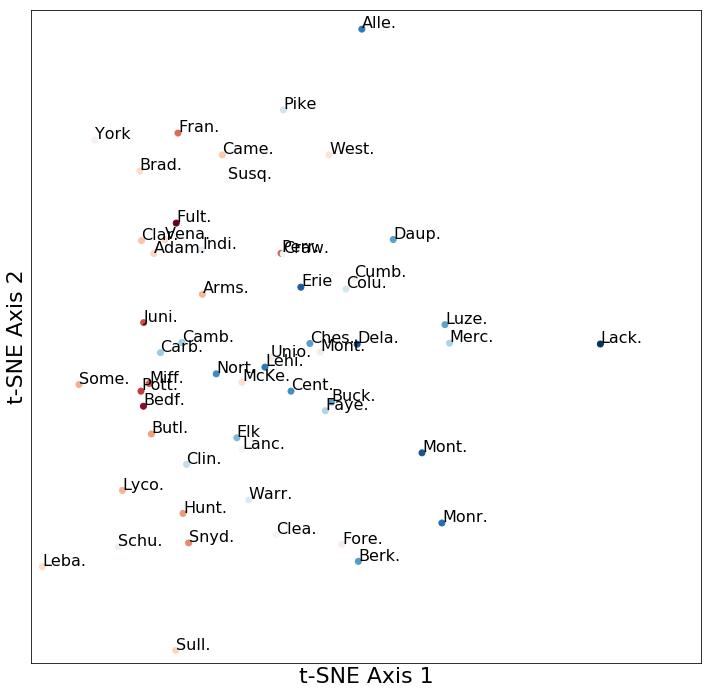

In [30]:
plot_and_annotate(z, pa_counties, colors=colors_08)
plt.savefig("pa_counties/pa_counties_z_scatter_color_08.pdf", dpi=300, bbox_inches="tight")

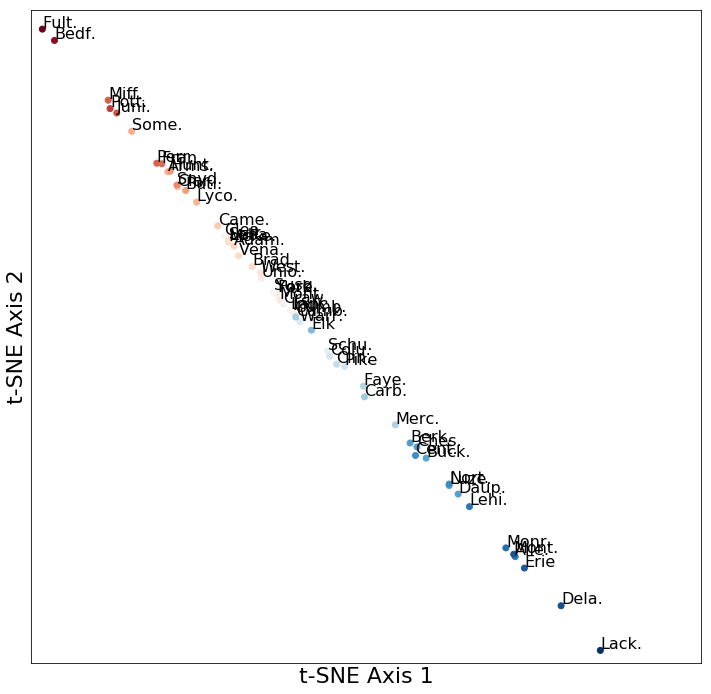

In [31]:
plot_and_annotate(y_reduced, pa_counties, colors=colors_08)
plt.savefig("pa_counties/pa_counties_y_scatter_color_08.pdf", dpi=300, bbox_inches="tight")

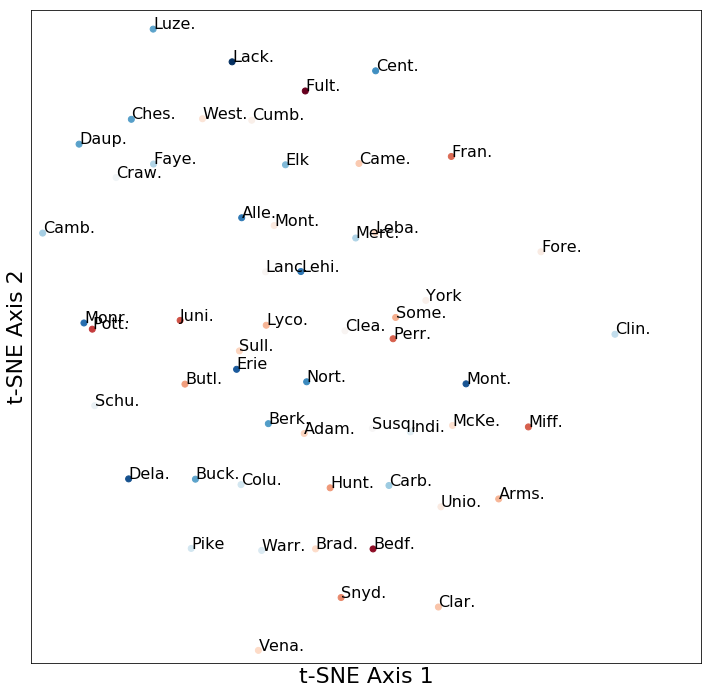

In [32]:
plot_and_annotate(vc_reduced, pa_counties, colors=colors_08)
plt.savefig("pa_counties/pa_counties_vc_scatter_color_08.pdf", dpi=300, bbox_inches="tight")

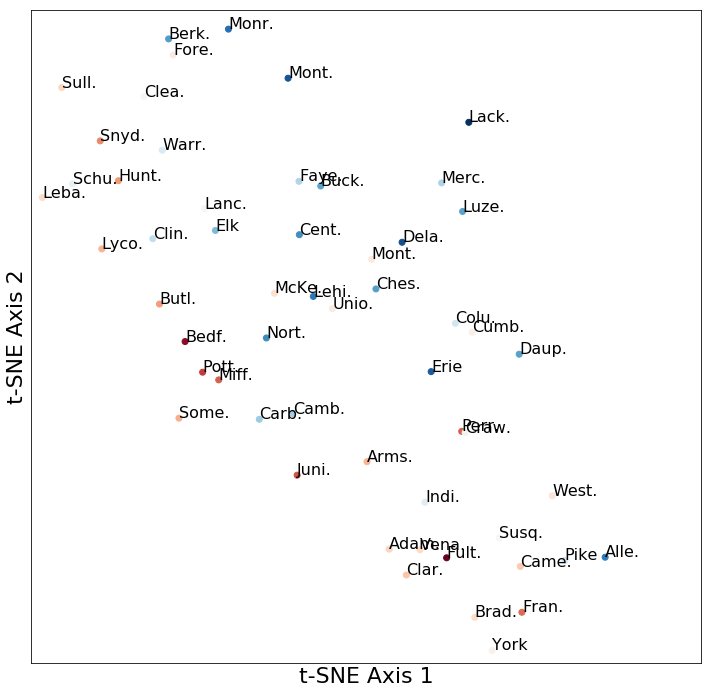

In [33]:
plot_and_annotate(beta_reduced, pa_counties, colors=colors_08)
plt.savefig("pa_counties/pa_counties_beta_scatter_color_08.pdf", dpi=300, bbox_inches="tight")

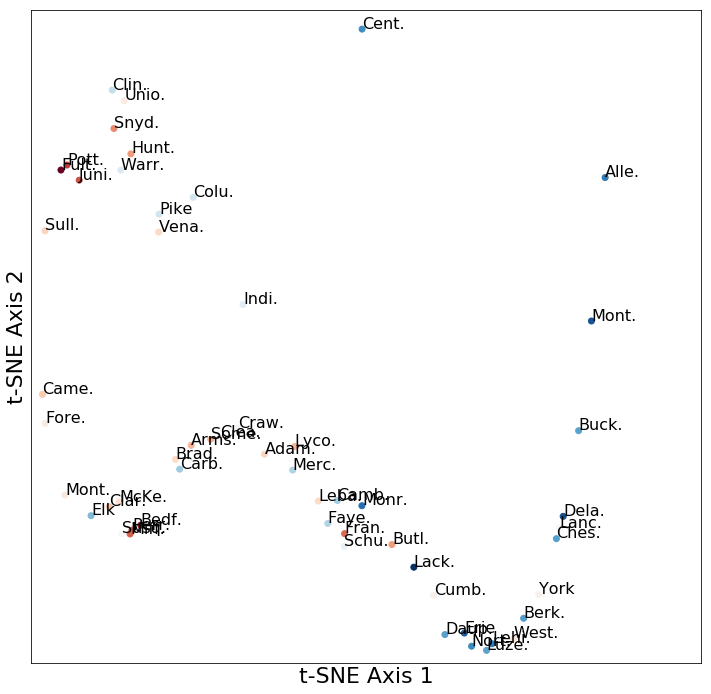

In [34]:
plot_and_annotate(u_reduced, pa_counties, colors_08)
plt.savefig("pa_counties/pa_counties_u_scatter_color_08.pdf", dpi=300, bbox_inches="tight")

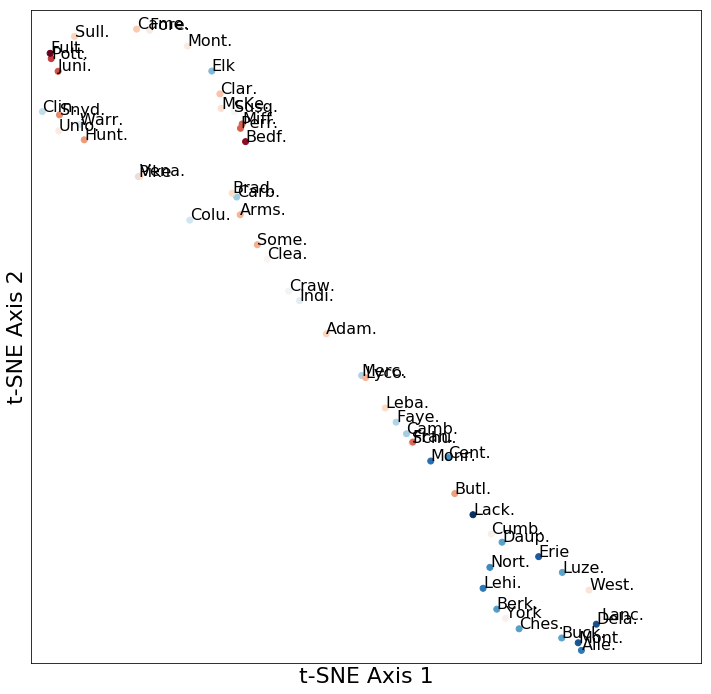

In [35]:
plot_and_annotate(cat_reduced, pa_counties, colors=colors_08)
plt.savefig("pa_counties/pa_counties_cat_scatter_color_08.pdf", dpi=300, bbox_inches="tight")